In [1]:
# 导入库
# 三元素
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 聚合类库
from sklearn.cluster import KMeans
# 展示类库
import pyecharts
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode

In [2]:
# 数据探索
df = pd.read_csv("./data/air_data.csv")
explore = df.describe(percentiles=[],include="all").T
explore['null'] = len(df) - explore['count']
explore[explore['null']>0]

,count,unique,top,freq,mean,std,min,50%,max,null
GENDER,62985,2,男,48134,NaN,NaN,NaN,NaN,NaN,3
WORK_CITY,60719,3310,广州,9385,NaN,NaN,NaN,NaN,NaN,2269
WORK_PROVINCE,59740,1185,广东,17507,NaN,NaN,NaN,NaN,NaN,3248
WORK_COUNTRY,62962,118,CN,57748,NaN,NaN,NaN,NaN,NaN,26
AGE,62568.0,NaN,NaN,NaN,42.476346,9.885915,6.0,41.0,110.0,420.0
SUM_YR_1,62437.0,NaN,NaN,NaN,5355.376064,8109.450147,0.0,2800.0,239560.0,551.0
SUM_YR_2,62850.0,NaN,NaN,NaN,5604.026014,8703.364247,0.0,2773.0,234188.0,138.0


In [3]:
explore

,count,unique,top,freq,mean,std,min,50%,max,null
MEMBER_NO,62988.0,NaN,NaN,NaN,31494.5,18183.213715,1.0,31494.5,62988.0,0.0
FFP_DATE,62988,3068,2011/01/13,184,NaN,NaN,NaN,NaN,NaN,0
FIRST_FLIGHT_DATE,62988,3406,2013/02/16,96,NaN,NaN,NaN,NaN,NaN,0
GENDER,62985,2,男,48134,NaN,NaN,NaN,NaN,NaN,3
FFP_TIER,62988.0,NaN,NaN,NaN,4.102162,0.373856,4.0,4.0,6.0,0.0
WORK_CITY,60719,3310,广州,9385,NaN,NaN,NaN,NaN,NaN,2269
WORK_PROVINCE,59740,1185,广东,17507,NaN,NaN,NaN,NaN,NaN,3248
WORK_COUNTRY,62962,118,CN,57748,NaN,NaN,NaN,NaN,NaN,26
AGE,62568.0,NaN,NaN,NaN,42.476346,9.885915,6.0,41.0,110.0,420.0
LOAD_TIME,62988,1,2014/03/31,62988,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# explot
# len(df)
# explot.loc['MEMBER_NO','count']

In [5]:
# 去除票价为0，平均折扣不为0，总飞行公里大于0的记录
df = df[df['SUM_YR_1'].notnull() & df['SUM_YR_2'].notnull()]

# 只保留票价非零的，或者平均折扣率与总飞行公里数同时为0的记录。
index1 = df['SUM_YR_1'] != 0
index2 = df['SUM_YR_2'] != 0
index3 = (df['SEG_KM_SUM'] == 0) & (df['avg_discount'] == 0)

df = df[index1 | index2 | index3]

In [6]:
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,2005/05/08,2005/08/26,男,4,NaN,NaN,CN,34.0,2014/03/31,...,500,500,500,900,900,1.000000,0.000000,0.000000,0.997506,1
62975,30765,2008/11/16,2013/11/30,男,4,TAIPEI,NaN,TW,38.0,2014/03/31,...,0,0,0,400,400,1.000000,0.000000,0.000000,0.997506,0
62976,10380,2010/07/08,2011/06/21,男,4,贵阳市,贵州省,CN,33.0,2014/03/31,...,0,0,0,213,0,0.500000,0.500000,0.995327,0.000000,1
62977,16372,2012/12/20,2012/12/20,男,4,桃园,NaN,TW,47.0,2014/03/31,...,0,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0


In [7]:
df = df[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
df.head(5)

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014/03/31,2006/11/02,1,210,580717,0.961639
1,2014/03/31,2007/02/19,7,140,293678,1.252314
2,2014/03/31,2007/02/01,11,135,283712,1.254676
3,2014/03/31,2008/08/22,97,23,281336,1.090870
4,2014/03/31,2009/04/10,5,152,309928,0.970658


In [8]:
# 构造新的数据，用来描述LRFMC五个指标
# L=LOAD_TIME-FFP_DATE(会员入会时间距观测窗口结束的月数=观测窗口的结束时间-入会时间（单位：月）)
# R=LAST_TO_END（客户最近一次乘坐公司距观测窗口结束的月数=最后一次。。。）
# F=FLIGHT_COUNT(观测窗口内的飞行次数)
# M=SEG_KM_SUM(观测窗口的总飞行里程)
# C=avg_discount(评价折扣率)

In [9]:
temp = {
  "L": pd.to_datetime(df['LOAD_TIME']) - pd.to_datetime(df['FFP_DATE']), #需要先转化datatime格式，再进行相减
  "R": df['LAST_TO_END'],
  "F": df['FLIGHT_COUNT'],
  "M": df['SEG_KM_SUM'],
  "C": df['avg_discount']
}

dataTransformed = pd.DataFrame(temp, columns=['L','R','F','M','C'])
dataTransformed['L'] = (dataTransformed['L']/np.timedelta64(1,'D')).astype(int)

dataTransformed.head(5)

,L,R,F,M,C
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658


In [10]:
# 进行标准化处理
dataZscore = (dataTransformed-dataTransformed.mean(axis=0)) / dataTransformed.std(axis=0)
dataZscore.columns = ['Z'+i for i in dataTransformed.columns]
dataZscore.head(5)

,ZL,ZR,ZF,ZM,ZC
0,1.435707,-0.944948,14.034016,26.761154,1.295540
1,1.307152,-0.911894,9.073213,13.126864,2.868176
2,1.328381,-0.889859,8.718869,12.653481,2.880950
3,0.658476,-0.416098,0.781585,12.540622,1.994714
4,0.386032,-0.922912,9.923636,13.898736,1.344335


In [27]:
dataZscore.loc[[2,3]]['ZL']

2    1.328381
3    0.658476
Name: ZL, dtype: float64

In [11]:
# 数据建模
# 客户价值分析模型构建主要分为二个部分：
# 1.利用K-Means算法进行聚类分析，得到细分的客户群
# 2.对细分的客户数进行特征分析，得到客户价值分析模型

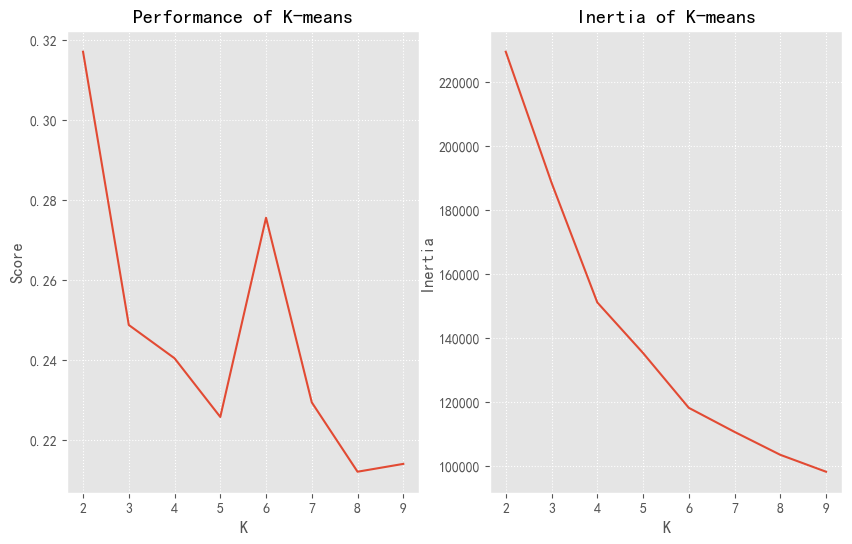

In [12]:
#找到最好的聚类簇
# import seaborn as sns

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 从sklearn导入聚类算法函数
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

random_state = 5
score = []
inertia = []
nums=range(2,10)

# 遍历多个可能的候选簇数量
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(dataZscore)
    inertia.append(kmeans.inertia_)#衡量模型性能
    score.append(silhouette_score(dataZscore, kmeans.labels_,sample_size=128, metric='euclidean')) #衡量聚类算法的指标

plt.figure(figsize=(10, 6))
# 使用ggplot的绘图风格
plt.style.use('ggplot')
plt.subplot(121)
plt.plot(nums,score)
plt.grid(linestyle=':')
plt.xlabel('K')
plt.ylabel('Score')
plt.title('Performance of K-means')

plt.subplot(122)
plt.plot(nums,inertia)
plt.grid(linestyle=':')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Inertia of K-means')

# plt.grid()
plt.show()

![image.png](./images/分析数据.png)

In [13]:
#通过上图观察可知最好的簇数量为5
k = 5
#初始化Kmeans模型
kmodel = KMeans(n_clusters=k)
kmodel.fit(dataZscore)
#查看聚类中心,及标签
print(kmodel.cluster_centers_)
print(kmodel.labels_)

[[ 0.48514132 -0.79994039  2.4835996   2.42466864  0.31484279]
 [ 1.16403096 -0.37828141 -0.08534469 -0.09297909 -0.16001281]
 [-0.70020148 -0.41743254 -0.15762772 -0.15663063 -0.27271489]
 [-0.00733667  0.01126036 -0.2528752  -0.2629597   2.06088173]
 [-0.31091675  1.69260579 -0.57460511 -0.53646211 -0.18944476]]
[0 0 0 ... 2 4 4]


In [45]:
kmeansCenters = pd.DataFrame(kmodel.cluster_centers_, columns=dataZscore.columns)
labelsCounts = pd.DataFrame(kmodel.labels_)[0].value_counts()
print(kmeansCenters.head())
kmeansLabels = pd.DataFrame(labelsCounts, index=None)
kmeansLabels.columns = ['Num']

print(kmeansLabels.head())

kmeansResult = pd.concat([kmeansCenters, kmeansLabels,], axis=1)
kmeansResult['Class'] = ['群体一','群体二','群体三','群体四','群体五']
kmeansResult = kmeansResult[['Class','Num', 'ZL', 'ZR', 'ZF', 'ZM', 'ZC']]
kmeansResult.head()

         ZL        ZR        ZF        ZM        ZC
0  0.485141 -0.799940  2.483600  2.424669  0.314843
1  1.164031 -0.378281 -0.085345 -0.092979 -0.160013
2 -0.700201 -0.417433 -0.157628 -0.156631 -0.272715
3 -0.007337  0.011260 -0.252875 -0.262960  2.060882
4 -0.310917  1.692606 -0.574605 -0.536462 -0.189445
     Num
0       
2  24364
1  15655
4  12003
0   5338
3   4684


,Class,Num,ZL,ZR,ZF,ZM,ZC
0,群体一,5338,0.485141,-0.799940,2.483600,2.424669,0.314843
1,群体二,15655,1.164031,-0.378281,-0.085345,-0.092979,-0.160013
2,群体三,24364,-0.700201,-0.417433,-0.157628,-0.156631,-0.272715
3,群体四,4684,-0.007337,0.011260,-0.252875,-0.262960,2.060882
4,群体五,12003,-0.310917,1.692606,-0.574605,-0.536462,-0.189445


In [30]:
pd.DataFrame(kmodel.labels_)[0]

0        0
1        0
2        0
3        0
4        0
        ..
62039    1
62040    1
62041    2
62042    4
62043    4
Name: 0, Length: 62044, dtype: int32

In [32]:
pd.DataFrame(kmodel.labels_)[0].value_counts()

0
2    24364
1    15655
4    12003
0     5338
3     4684
Name: count, dtype: int64

In [52]:
#客户价值雷达图
temp = kmeansResult

#分别取出不同群体的特征值
customer1 = [temp.iloc[0,2:].values.tolist()]
customer2 = [temp.iloc[1,2:].values.tolist()]
customer3 = [temp.iloc[2,2:].values.tolist()]
customer4 = [temp.iloc[3,2:].values.tolist()]
customer5 = [temp.iloc[4,2:].values.tolist()]


#设置背景分割线颜色
split_line_style = {'color': [
                    'rgba(238, 197, 102, 0.1)', 'rgba(238, 197, 102, 0.2)',
                    'rgba(238, 197, 102, 0.4)', 'rgba(238, 197, 102, 0.6)',
                    'rgba(238, 197, 102, 0.8)', 'rgba(238, 197, 102, 1)'
                    ][::-1]  
}

r = kmeansCenters
max = r.values.max()
min = r.values.min()

#背景分割线颜色
split_line_style = {'color': [
                    'rgba(238, 197, 102, 0.1)', 'rgba(238, 197, 102, 0.2)',
                    'rgba(238, 197, 102, 0.4)', 'rgba(238, 197, 102, 0.6)',
                    'rgba(238, 197, 102, 0.8)', 'rgba(238, 197, 102, 1)'
                    ][::-1]
    
}


radar = Radar(init_opts=opts.InitOpts(theme='dark', bg_color='#161627', height='800px', width='1000px'))
radar.add_schema(shape='circle',
                 textstyle_opts=opts.TextStyleOpts(color='rgb(238, 197, 102)'),
                 axisline_opt=opts.LineStyleOpts(is_show=True, color='rgba(238, 197, 102, 1)'),
                 splitline_opt=opts.SplitLineOpts(is_show=True, linestyle_opts=split_line_style),
                 schema=[opts.RadarIndicatorItem(name='ZL',min_=min-0.1, max_=max+0.1),
                         opts.RadarIndicatorItem(name='ZR',min_=min-0.1, max_=max+0.1),
                         opts.RadarIndicatorItem(name='ZF',min_=min-0.1, max_=max+0.1),
                         opts.RadarIndicatorItem(name="ZM",min_=min-0.1, max_=max+0.1),
                         opts.RadarIndicatorItem(name="ZC",min_=min-0.1, max_=max+0.1),
                         ])

radar.add('群体一', customer1, symbol='none',
          label_opts=opts.LabelOpts(is_show=True),
          linestyle_opts=opts.LineStyleOpts(color='#9b47b0', width=1, opacity=0.6),
          areastyle_opts=opts.AreaStyleOpts(color='#9b47b0', opacity=0.1))

radar.add('群体二', customer2, symbol='none',
          label_opts=opts.LabelOpts(is_show=True),
          linestyle_opts=opts.LineStyleOpts(color='#5cb047', width=1, opacity=0.6),
          areastyle_opts=opts.AreaStyleOpts(color='#5cb047', opacity=0.05))

radar.add('群体三', customer3, symbol='none',
          label_opts=opts.LabelOpts(is_show=True),
          linestyle_opts=opts.LineStyleOpts(color='#e1306c', width=1, opacity=0.6),
          areastyle_opts=opts.AreaStyleOpts(color='#e1306c',opacity=0.05))

radar.add('群体四', customer4, symbol='none',
          label_opts=opts.LabelOpts(is_show=True),
          linestyle_opts=opts.LineStyleOpts(color='#f77737', width=1, opacity=0.6),
          areastyle_opts=opts.AreaStyleOpts(color='#f77737',opacity=0.05))

radar.add('群体五', customer5, symbol='none',
          label_opts=opts.LabelOpts(is_show=True),
          linestyle_opts=opts.LineStyleOpts(color='#4285f4', width=1, opacity=0.6),
          areastyle_opts=opts.AreaStyleOpts(color='#4285f4',opacity=0.05))

radar.set_global_opts(legend_opts=opts.LegendOpts(is_show=True, selected_mode='flase', pos_bottom=5),
                      title_opts=opts.TitleOpts(title="客户价值雷达图", pos_left='center',
                                                title_textstyle_opts=opts.TextStyleOpts(font_size=20)))


radar.render_notebook()

# radar.render('客户价值雷达图.html')
